Импортим нужные библиотеки и считываем данные. Смотрим на них.

In [379]:
import numpy as np
import pandas as pd

In [390]:
data = pd.read_csv('abt_em.tab', delimiter='\t')

In [391]:
data

,customerID,atm_trn_cnt_1,atm_trn_cnt,bt_trn_cnt_1,bt_trn_cnt,chq_trn_cnt_1,chq_trn_cnt,cc_trn_cnt_1,cc_trn_cnt,elt_trn_cnt_1,...,npv_total,tra_avg_bal_1,tra_avg_bal,tr_min_bal,tra_auth_no,tra_auth_yes,call_enq_cnt,call_trn_cnt_1,call_trn_cnt,Change_In_ATM_TR
0,3764517,5,23,14,1,0,0,0,0,12,...,468.37,7235,7218.98,6067.53,-1,-1,0,0,0,360.000000
1,4440112,10,5,10,2,0,0,11,0,10,...,-395.25,254,234.26,87.78,-1,-1,0,0,0,-50.000000
2,2267213,0,0,14,1,0,0,16,10,16,...,38.00,0,0.00,0.00,-1,-1,1,10,0,NaN
3,4488910,16,6,10,1,9,1,10,1,13,...,-142.88,568,561.63,284.96,-1,-1,0,0,0,-62.500000
4,2150617,0,0,18,2,0,0,10,0,10,...,-166.96,172,193.23,109.03,-1,-1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,3010910,9,2,9,3,10,4,24,31,34,...,6635.77,0,0.00,0.00,-1,-1,0,0,0,-77.777778
4254,1142196,23,3,18,5,0,0,10,5,32,...,639.00,6796,6781.59,5835.38,-1,-1,0,0,0,-86.956522
4255,4695416,7,1,10,6,0,0,3,8,10,...,3931.03,2837,2821.27,952.03,-1,-1,0,0,0,-85.714286
4256,1007358,10,7,10,2,13,1,10,6,25,...,2829.80,1950,1940.32,967.01,-1,-1,0,6,0,-30.000000


In [392]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4258 entries, 0 to 4257
Data columns (total 73 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        4258 non-null   int64  
 1   atm_trn_cnt_1     4258 non-null   int64  
 2   atm_trn_cnt       4258 non-null   int64  
 3   bt_trn_cnt_1      4258 non-null   int64  
 4   bt_trn_cnt        4258 non-null   int64  
 5   chq_trn_cnt_1     4258 non-null   int64  
 6   chq_trn_cnt       4258 non-null   int64  
 7   cc_trn_cnt_1      4258 non-null   int64  
 8   cc_trn_cnt        4258 non-null   int64  
 9   elt_trn_cnt_1     4258 non-null   int64  
 10  elt_trn_cnt       4258 non-null   int64  
 11  ht_trn_cnt_1      4258 non-null   int64  
 12  ht_trn_cnt        4258 non-null   int64  
 13  it_trn_cnt        4258 non-null   int64  
 14  it_trn_cnt_1      4258 non-null   int64  
 15  pos_trn_cnt_1     4258 non-null   int64  
 16  pos_trn_cnt       4258 non-null   int64  


Видно, что в последнем признаке очень много пропусков(почти половина). Поэтому удаляем его вместе с номером клиента(эти признаки не информативны).

In [393]:
data = data.drop(columns=['customerID'])
data = data.drop(columns=['Change_In_ATM_TR'])

Смотрим на object-признаки и приминяем one-hot кодирование.

In [394]:
data[['arrear_ind', 'chq_acc_ind', 'gender', 'title']]

,arrear_ind,chq_acc_ind,gender,title
0,N,N,F,MS
1,N,N,F,MRS
2,N,N,M,MR
3,N,Y,F,MISS
4,N,N,M,MR
...,...,...,...,...
4253,N,Y,M,MR
4254,N,N,M,MR
4255,N,Y,F,MISS
4256,N,Y,M,MR


In [395]:
print(data['arrear_ind'].unique())
print(data['chq_acc_ind'].unique())
print(data['gender'].unique())
print(data['title'].unique())

['N' 'Y']
['N' 'Y']
['F' 'M' 'U']
['MS' 'MRS' 'MR' 'MISS' 'UNKNOWN' 'AC' 'REL' 'MASTER']


In [396]:
for column in ['arrear_ind', 'chq_acc_ind']:
    data[column] = data[column].replace('N', 0)
    data[column] = data[column].replace('Y', 1)
data = pd.get_dummies(data)

## Предположение:
Все признаки с "_1" являются избыточными.

In [397]:
ar = data.columns
drop_columns=[]
for i in ar:
    if i[-2:] == '_1':
        drop_columns.append(i)
data = data.drop(columns=drop_columns)

In [398]:
data.columns

Index(['atm_trn_cnt', 'bt_trn_cnt', 'chq_trn_cnt', 'cc_trn_cnt', 'elt_trn_cnt',
       'ht_trn_cnt', 'it_trn_cnt', 'pos_trn_cnt', 'trd_trn_cnt', 'cc_clos',
       'acc_credit', 'acc_funds', 'arrear_ind', 'cc_appr_amt', 'cc_avg_bal',
       'cc_min_bal', 'chq_acc_ind', 'cust_age', 'days_brtday',
       'cc_ea_open_mth', 'sa_ea_open_mth', 'tr_ea_open_mth', 'enq_trn_cnt',
       'equity_amt', 'recency', 'fol_l_clos_mth', 'fol_l_open_mth', 'reject',
       'sa_la_clos_mth', 'sa_la_open_mth', 'tr_la_clos_mth', 'tr_la_open_mth',
       'cust_class', 'dep_max_amt', 'ch_addr', 'ch_marital', 'npv_savings',
       'npv_trans', 'depos_count', 'joint_acc_cnt', 'prod_count',
       'sav_acc_count', 'tra_acc_count', 'wthdr_count', 'avg_bal',
       'eqity_secur', 'rel_age', 'sav_avg_bal', 'npv_total', 'tra_avg_bal',
       'tr_min_bal', 'tra_auth_no', 'tra_auth_yes', 'call_enq_cnt',
       'call_trn_cnt', 'gender_F', 'gender_M', 'gender_U', 'title_AC',
       'title_MASTER', 'title_MISS', 'title_MR'

Разделяем данные на таблицу объекты-признаки и столбец правильных ответов.

In [399]:
y = data['cc_clos']
data = data.drop(columns=['cc_clos'])

Далее, воспользуемся RFE для отбора 10 важнейших признаков. Будем исользовать модель xgbclassifier.

In [400]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42, max_depth=5, learning_rate=0.1)
rfe = RFE(model_xgb, 10)

fit = rfe.fit(data, y)

drop_columns=[]
for i in range(len(data.columns)):
    if fit.ranking_[i]!=1:
        drop_columns.append(data.columns[i])
        
data=data.drop(columns=drop_columns)

Разделяем данные на train и test, обучаем, смотрим roc auc, т.к. gini = 2*roc_auc-1. Нам нужно gini хотя бы 0.6, значит roc auc хотя бы 0.8.

In [401]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)
model_xgb.fit(x_train, y_train)

train_predicted = model_xgb.predict(x_train)
test_predicted = model_xgb.predict(x_test)

train_ras = roc_auc_score(y_train, train_predicted)
test_ras = roc_auc_score(y_test, test_predicted)
print("Train: ", train_ras)
print('Test: ', test_ras)

Train:  0.9645390070921986
Test:  0.8011164367547347


Набрали на тестовой выборке 0.8, значит можно строить предсказание для всего набора. Построим график roc, и матрицу несоответствий.

In [404]:
y_pred = model_xgb.predict(data)
roc_auc_score(y, y_pred)

0.9180429915864288

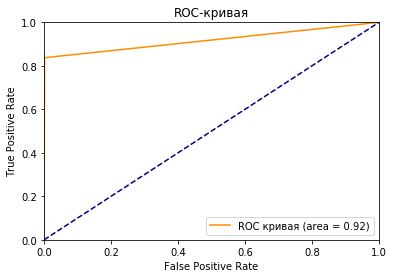

In [405]:
fpr, tpr, treshold = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()


Test confusion_matrix


Text(33.0, 0.5, 'True')

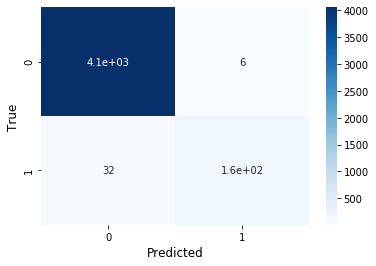

In [407]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

Как видим, качество довольно неплохое.